In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('BancoDeDados.csv')
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   amostra               116581 non-null  int64  
 1   id_cliente            116581 non-null  object 
 2   id_unico_cliente      116581 non-null  object 
 3   item_id               116581 non-null  int64  
 4   cep_cliente           116581 non-null  int64  
 5   cidade_cliente        116581 non-null  object 
 6   estado_cliente        116581 non-null  object 
 7   id_pedido             116581 non-null  object 
 8   status_pedido         116581 non-null  object 
 9   horario_pedido        116581 non-null  object 
 10  pedido_aprovado       116567 non-null  object 
 11  pedido_entregador     115368 non-null  object 
 12  pedido_entregue       114066 non-null  object 
 13  data_estimada         116581 non-null  object 
 14  id_vendedor           116581 non-null  object 
 15  

### Dicionário de dados.  

- **amostra**: é uma numeração crescente dos dados. 
- **id_cliente**: é o número usado pelo cliente na compra. 
- **id_unico_cliente**: é o número único dado para cada cliente em função do ip dele, independente da compra. O item id, que é o número de identificação do item comprado. 
- **cep_cliente**: é o CEP de moradia ou de entrega do cliente. 
- **cidade_cliente**: é a cidade de onde foi feito o pedido, 
- **estado_cliente**: é o Estado de onde foi feito o pedido, id pedido, que é o número de identificação da compra.
- **status_pedido**: é o status de entrega ou não do pedido. 
- **horario_pedido**: é o horário e data em que o pedido foi feito. Pedido aprovado vai ser horário e data em que o entregador recebeu o pedido. 
- **pedido_entregue**: é a data e horário em que o pedido foi entregue.
- **data_estimada**: é o horário e a data estimada de entrega, 
- **id_vendedor**: é o número de identificação do vendedor. 
- **preco**: é o preço do produto, frete é o preço do frete. 
- **pagamento_sequencial**: caso o cliente faça uma compra utilizando mais de um método de pagamento ele aciona um pagamento sequencial, que vai ser criado para acomodar todas as ordens de pagamento.
- **pagamento_tipo**: é o método de pagamento, se foi boleto, cartão de crédito, cartão de débito. 
- **pagamento_prestacoes**: vai ser o número de prestações escolhido pelo cliente. 
- **pagamento_valor**: é o valor pago. 
- **review**:  é o review de todo o processo. Tem que ter uma nota que o consumidor vai dar.
- **categoria**:  é a categoria do item comprado, categoria inglês é o nome da categoria em inglês. 
- **cep_vendedor**: é o CEP do vendedor. 
- **cidade_vendedor**: é a cidade do vendedor.
- **estado_vendedor**: é o Estado do vendedor.

In [4]:
def plot_perc(st,dados):
    plt.figure(figsize=(20,8))

    g = sns.countplot(x=st, data=dados, orient='h')
    g.set_title("Distribuição do estado dos clientes", fontsize=20)
    g.set_xlabel("Estado", fontsize=17)
    g.set_ylabel("Contagem", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    
    sizes = [] # armazenar o tamanho das barras
    
    for p in g.patches: # g.patches, trás as informações das barras 
        height = p.get_height() # pegando a altura (quantidade de unidades de cada elemento da coluna)
        sizes.append(height)
        # g.text, eu imputo texto no gráfico. 
        g.text(p.get_x()+p.get_width()/1.6, # aqui estou alinhando o valor no centro da barra.  
                              height + 200, # Definindo a altura do texto 
      '{:1.2f}%'.format(height/116581*100), # Calculando a porcentagem
            ha="center", va='bottom',fontsize=12) 
        
    g.set_ylim(0, max(sizes) * 1.1) # definindo o limite y da caixa do gráfico

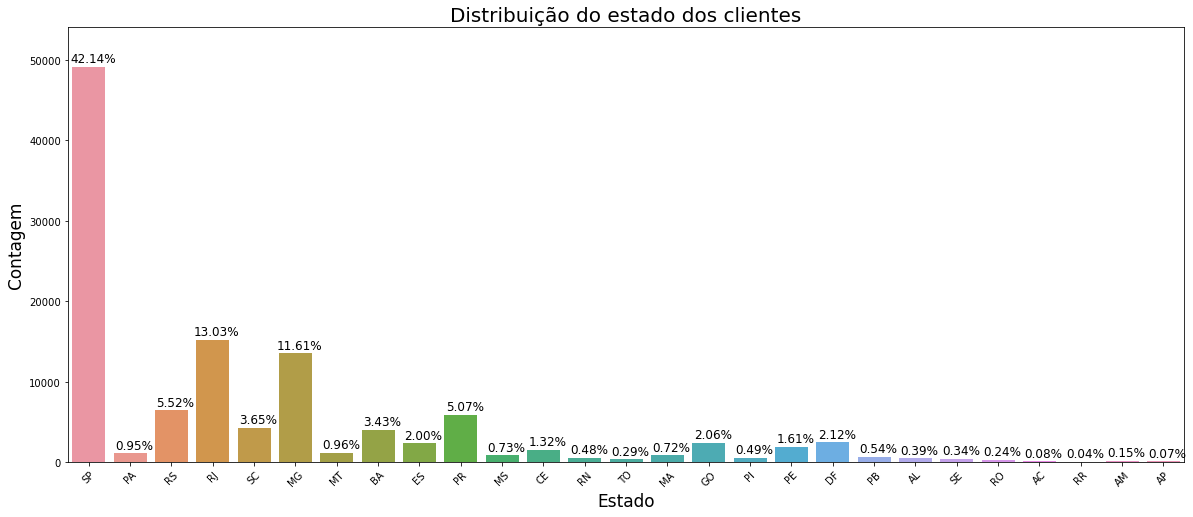

In [5]:
plot_perc('estado_cliente',df)

Percebemos que claramente o estado de São Paulo tem bem mais compradores. Apesar da gente ter um número bem expressivo de compradores em São Paulo, a gente tem muita gente no Rio de Janeiro, Minas Gerais, Paraná, Rio Grande do Sul tem uma certa quantidade também.

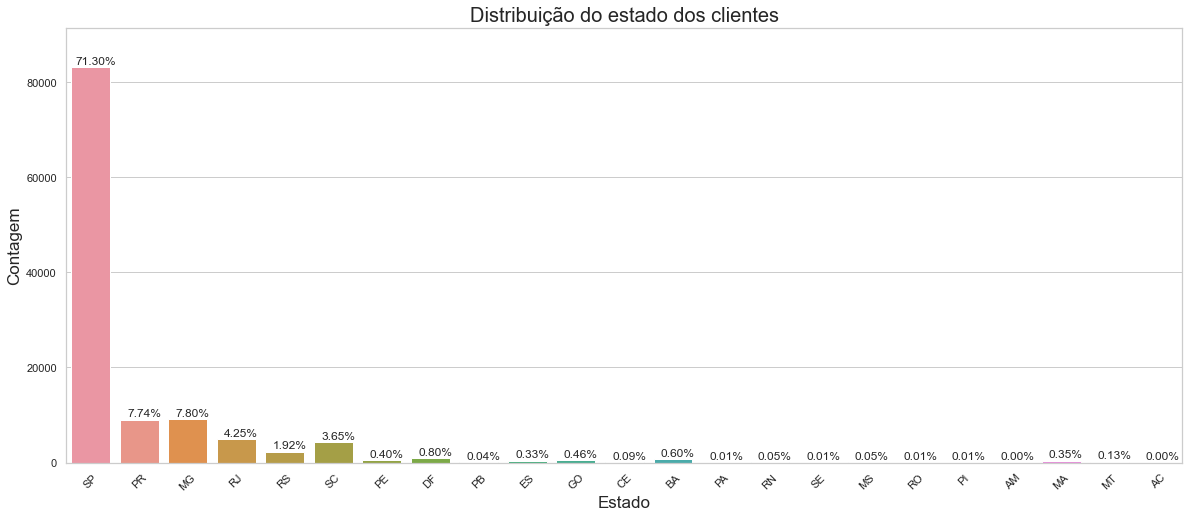

In [63]:
plot_perc('estado_vendedor', df)

No caso dos vendedores, a diferença é muito maior, então tenho mais de 70% dos meus vendedores em São Paulo. Isso é interessante, porque podemos pensar em uma estratégia de frete, ou incentivar vendedores de outras localidades, o que acaba melhorando também os compradores. A pessoa está em Manaus, ela vai ter que comprar de um vendedor que está em São Paulo, desse modo o frete poderia ser muito caro, poderia então ser aberto um ponto de venda em Manaus também, o que levaria essa pessoa a comprar mais.

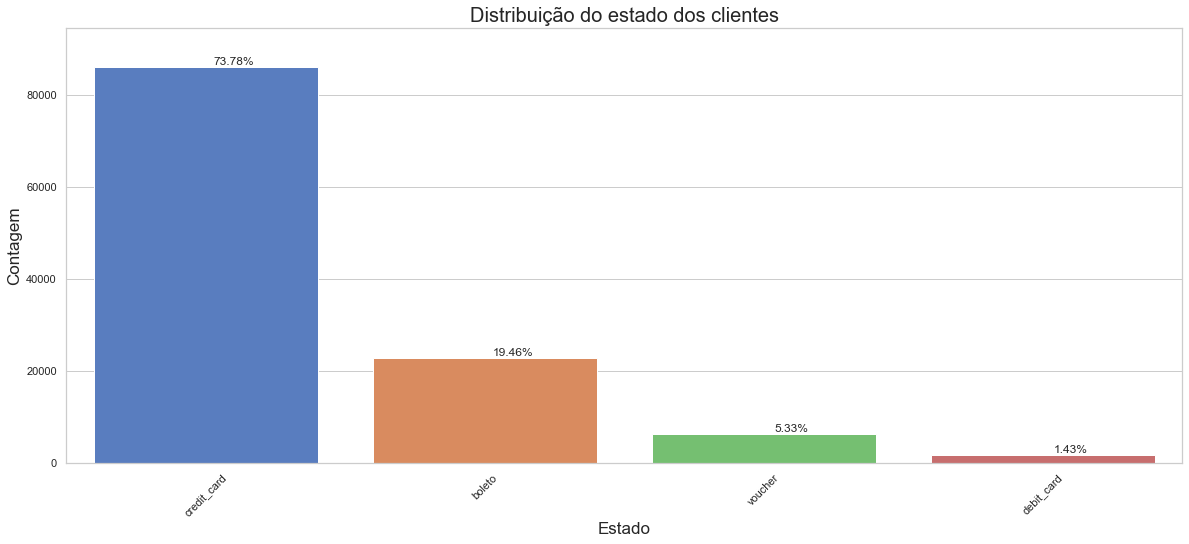

In [64]:
plot_perc('pagamento_tipo',df)

Percebe-se que a gente tem um valor bem maior de uso de cartão de crédito, em seguida um valor razoável de boleto, voucher e cartão de débito quase ninguém.  
É interessante que a gente pode aumentar as promoções para pagamento à vista, para que a gente possa aumentar a quantidade de pagamentos com boleto ou cartão de crédito. Acabaríamos inclusive aumentando a segurança, porque quando você tem o pagamento em boleto, os casos de fraude por cartão de crédito diminuem bastante.

### Modelos RFM

Utilizaremos o modelo RFM para fazera a **segmentação** dos nossos clientes. Em inglês, ele se chama RFM porque fala de ressence, frequence e monetary.  
- Recência (Recency): Refere-se à última vez que um cliente fez uma compra ou interagiu com uma empresa. Os clientes mais recentes tendem a ser mais engajados e mais propensos a gastar dinheiro do que aqueles que não compraram há muito tempo.
- Frequência (Frequency): Mede a quantidade de compras ou interações que um cliente teve com uma empresa em um determinado período de tempo. Os clientes que compram com frequência tendem a ser mais valiosos do que aqueles que compram com menos frequência.
- Monetaridade (Monetary): Refere-se ao valor total que um cliente gasta com uma empresa em um determinado período de tempo. Os clientes que gastam mais dinheiro tendem a ser mais valiosos para um negócio.  

Com base nesse modelo de marketing que vamos nos basear, a gente vai primeiro criar um novo banco de dados apenas com as informações que a gente vai precisar para fazer análise de recência, frequência e monetariedade.

In [6]:
df_olist = df[['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco']]

In [7]:
df_compra = df.groupby('id_unico_cliente').horario_pedido.max().reset_index()
df_compra.columns = ['id_unico_cliente', 'DataMaxCompra'] # renomeando as colunas 

In [8]:
df_compra['DataMaxCompra']= pd.to_datetime(df_compra['DataMaxCompra'])  

In [9]:
df_compra

,id_unico_cliente,DataMaxCompra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94082,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94083,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94084,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94085,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


### Calculando o número ótimo de clusters com a recência

In [10]:
#seleciona o ponto de observação como a data máxima de compra em nosso df
df_compra['Recencia'] = (df_compra['DataMaxCompra'].max() - df_compra['DataMaxCompra']).dt.days

#junta esse df com o nosso novo chamado df_user
df_usuario = pd.merge(df_olist, df_compra[['id_unico_cliente','Recencia']], on='id_unico_cliente')

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


In [11]:
def calcular_wcss(data):
    wcss = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X=data)
        data["clusters"] = kmeans.labels_  
        wcss.append(kmeans.inertia_) # é o WCSS
    return wcss

In [12]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.cluster import KMeans

df_recencia = df_usuario[['Recencia']]
soma_quadrados = calcular_wcss(df_recencia)

In [13]:
soma_quadrados

[2733029504.943304,
 807902990.283308,
 362053130.0620575,
 213827452.26361752,
 135866064.41246846,
 96309706.31402147,
 69764549.05486567,
 55732428.64623367,
 44155716.324662164]

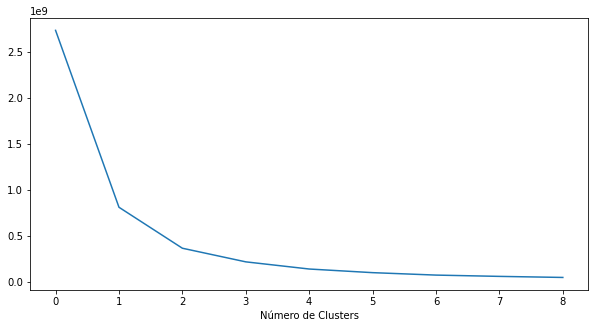

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(soma_quadrados)
plt.xlabel("Número de Clusters")
plt.show()

A partir do valor indicado pelo cotovelo, que é exatamente quando ele dobra, quando você começa a ter essa saturação, ou seja, não muda muita coisa, significa que não vai ter mais um ganho em relação ao aumento de clusters. Se eu usar 5, 6, 7 não muda muita coisa, então o 4 seria o número ideal?.

E como ter certeza do número ideal? Será que a inércia é tão boa assim? O que acontece é que a inércia é uma métrica que funciona bem em clusters que são redondos, mas ela acaba sendo meio ruim se algum dos clusters tem formato irregular, porque se algum cluster tem formato irregular, é possível que alguns dos pontos estejam muito longe do central e de outros muito perto, então é como se você tivesse uma variância muito grande.

Acontece que o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters, é o ponto da curva mais distante de uma reta traçada entre os pontos (0, 2.8) e (8, 0.2).

In [15]:
import math
def numero_otimo_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distancias = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominador = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distancias.append(numerador/denominador)
    
    return distancias.index(max(distancias)) + 2

In [16]:
# calculando a soma dos quadrados para as quantidade de clusters
soma_quadrados = calcular_wcss(df_recencia)

# calculando a quantidade ótima de clusters
n = numero_otimo_clusters(soma_quadrados)
n

4

Podemos concluir então que realmente é o quatro, como a gente supôs pela regra do cotovelo, é o melhor valor, essa regra matemática me define que sem sombra de dúvidas quatro é o melhor valor.

### Calculando a recência para o número ótimo de clusters

In [17]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=4)
df_usuario['RecenciaCluster'] = kmeans.fit_predict(df_recencia)

In [18]:
agrupado_por_cluster = df_usuario.groupby('RecenciaCluster')['Recencia'].mean().reset_index()
agrupado_por_cluster

,RecenciaCluster,Recencia
0,0,489.070832
1,1,187.076277
2,2,318.687376
3,3,66.405850


Como no final vamos querer criar um sistema de pontuação para os clientes que vai ser baseado em notas que representam os clusters, eu preciso que isso esteja organizado. Nesse caso, de forma decrescente, porque a recência é o tempo que faz que o cliente não compra. Então vamos dar uma pontuação maior para aqueles clientes que fazem pouco tempo que não compram.

In [19]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by= 'Recencia',
                                                                     ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado

,RecenciaCluster,Recencia
0,0,489.070832
1,2,318.687376
2,1,187.076277
3,3,66.405850


In [20]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado

,RecenciaCluster,Recencia,index
0,0,489.070832,0
1,2,318.687376,1
2,1,187.076277,2
3,3,66.405850,3


Desse modo a maior recencia vai ficar com a nota zero.

In [21]:
juntando_cluster = pd.merge(df_usuario,agrupado_por_cluster_ordenado[['RecenciaCluster','index']], on='RecenciaCluster')
juntando_cluster 

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,0
...,...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,3,3
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,3,3
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,3,3
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,3,3


In [22]:
# Não será mais necessário esta coluna. Usaremos a coluna index. 
removendo_dados = juntando_cluster.drop(['RecenciaCluster'], axis=1)
removendo_dados

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0
...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,3
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,3
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,3
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,3


In [23]:
# Renomeando a coluna 'index' 
df_final = removendo_dados.rename(columns={"index":'RecencialCluster'})
df_final

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecencialCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0
...,...,...,...,...,...,...,...
116576,c5da6424f1f5decedef8672a1a0103e1,ce2172509c4149d65212484eb761bc37,2018-08-21 11:29:05,1,289.49,12,3
116577,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,1,19.00,41,3
116578,8d80e477643ec569b24592ce3d9dfc4c,ee1cfdc92e449920e25d3ca4ab4da4f6,2018-07-23 18:35:14,2,39.90,41,3
116579,8c3c961a52bb5a0ffbce1d4e6d25cd67,ab0cf72dfe0538a63a57d6905ccb7b57,2018-07-28 17:55:27,1,57.90,36,3


### Automatizando todo esse processo

In [24]:
# Fazermos uma função para automatizar este processo
# função para ordenar o número de clusters:
def ordenar_cluster(cluster_nome, target_nome, df, ascending):
    novo_nome = 'novo' + cluster_nome
    agrupado_por_cluster = df.groupby(cluster_nome)[target_nome].mean().reset_index()
    agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nome,
                                                                     ascending=ascending).reset_index(drop=True)
    agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
    juntando_cluster = pd.merge(df,agrupado_por_cluster_ordenado[[cluster_nome,'index']], on=cluster_nome)
    removendo_dados = juntando_cluster.drop([cluster_nome],axis=1)
    df_final = removendo_dados.rename(columns={"index":cluster_nome})
    return df_final

In [25]:
df_usuario = ordenar_cluster('RecenciaCluster', 'Recencia',df_usuario, False)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [26]:
# Podemos percecber que está conforme o planejado
df_usuario.groupby('RecenciaCluster')['Recencia'].describe()['mean']

RecenciaCluster
0    489.070832
1    318.687376
2    187.076277
3     66.405850
Name: mean, dtype: float64

### Calculando a Frequência 

In [27]:
# cria um df com a quantidade de ordens para cada cliente
df_frequencia = df.groupby('id_unico_cliente').pedido_aprovado.count().reset_index()
df_frequencia.columns = ['id_unico_cliente','Frequencia']

# adiciona esses dados em nosso df principal
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1


In [28]:
# rodando o kmeans para nossa quantidade ótima de clusters
df_frequencia = df_usuario[['Frequencia']]
kmeans = KMeans(n_clusters=4)
df_usuario['FrequenciaCluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0


In [29]:
# ordena os clusters de frequência
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,619.0,22.844911,6.267127,15.0,19.0,22.0,24.0,38.0
2,9317.0,5.744875,2.312449,4.0,4.0,5.0,6.0,14.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [30]:
df_usuario = ordenar_cluster('FrequenciaCluster', 'Frequencia', df_usuario, True)

In [31]:
df_usuario.groupby('FrequenciaCluster')['Frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequenciaCluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9317.0,5.744875,2.312449,4.0,4.0,5.0,6.0,14.0
2,619.0,22.844911,6.267127,15.0,19.0,22.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


### Receita

In [32]:
#calcula a receita para cada cliente
df_receita = df.groupby('id_unico_cliente').pagamento_valor.sum().reset_index()
df_receita.columns = ['id_unico_cliente','Receita']

#junta com o df principal
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33


In [33]:
# rodando o kmeans para nossa quantidade ótima de clusters
df_pagamento = df_usuario[['Receita']]
kmeans = KMeans(n_clusters=4)
df_usuario['ReceitaCluster'] = kmeans.fit_predict(df_pagamento)

df_usuario = ordenar_cluster('ReceitaCluster', 'Receita', df_usuario, True)

df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


In [34]:
#ordena os clusters
df_usuario.groupby('ReceitaCluster')['Receita'].describe()

,count,mean,std,min,25%,50%,75%,max
ReceitaCluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [35]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0,1,0,148.33,0


### Criando uma pontuação para os clientes

In [37]:
# Dropando colunas que não usaremos
df_final = df_usuario.drop(['id_cliente','horario_pedido','item_id','preco'],axis=1)
df_final.head()

,id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0


In [38]:
#renomeando as colunas
df_final.columns = ['Id_unico_cliente', 'Recencia', 'RecenciaCluster', 'Frequencia', 'FrequenciaCluster', 'Receita', 'ReceitaCluster']
df_final.head()

,Id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster
0,861eff4711a542e4b93843c6dd7febb0,474,0,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,0,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,0,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,0,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,0,1,0,148.33,0


In [39]:
df_final['Pontuacao'] = df_usuario['RecenciaCluster'] + df_usuario['FrequenciaCluster'] + df_usuario['ReceitaCluster']

In [56]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['Pontuacao']>=1,'Segmento'] = 'Business' 
df_final.loc[df_final['Pontuacao']>=3,'Segmento'] = 'Master' 
df_final.loc[df_final['Pontuacao']>=5,'Segmento'] = 'Premium' 

Calcularemos a pontuação geral do cliente baseado nesses clusters e também definimos 4 opções: inativo, business, master e premium.

In [57]:
df_final.sample(n = 10)

,Id_unico_cliente,Recencia,RecenciaCluster,Frequencia,FrequenciaCluster,Receita,ReceitaCluster,Pontuacao,Segmento
35159,616dfcfd995ac141266ea0c05a2f72d1,382,1,1,0,847.82,0,1,Business
61274,e852cefa1eaa639fc79ae8879c9a05ef,213,2,1,0,203.97,0,2,Business
45977,e7ab1ac63cd7d365acdc426c14f4c84f,277,1,2,0,60.18,0,1,Business
37326,b61de7fcc331da9b8493a4ec5ba50a51,269,1,2,0,471.40,0,1,Business
11420,cbd70d39b38dc382a7104dca8fa6ad28,466,0,2,0,350.56,0,0,Inativo
21509,316e64f500c9c546f11bdb5d22bfc7b8,391,1,1,0,605.85,0,1,Business
90957,f45063b55c91096639481d35c820646b,30,3,1,0,36.73,0,3,Master
55913,3a29d9f6fb5aef9e5ecbf04e28540215,191,2,1,0,90.27,0,2,Business
69819,cf381e9551dd911625f7afe5804d66ba,210,2,1,0,37.77,0,2,Business
107562,5b409ca5e4383fcfa2d21b68c21e5a04,426,0,4,1,2570.48,0,1,Business


In [42]:
#df_final.to_csv('RFM.csv')

### Analisando as Features

In [58]:
def plot_segmento(x,y,data):
    sns.set(palette='muted', color_codes=True, style='whitegrid')
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    sns.despine(left=True)
    sns.scatterplot(x=x, y=y, hue='Segmento', data=data, size='Segmento', sizes=(50,150), size_order=['Premium','Master','Business','Inativo'])
    axs.set_title('Segmento de Cliente')
    plt.show()

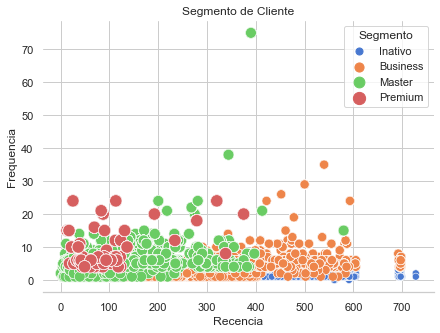

In [59]:
plot_segmento('Recencia', 'Frequencia', df_final)

Com base na recência, a gente vê que aqueles clientes que tem maior frequência e menor recência, ou seja, compraram mais e a última vez que compraram faz menos tempo, estão no premium. Enquanto aqueles que faz muito tempo que não compram, 700 dias, é considerado inativo.

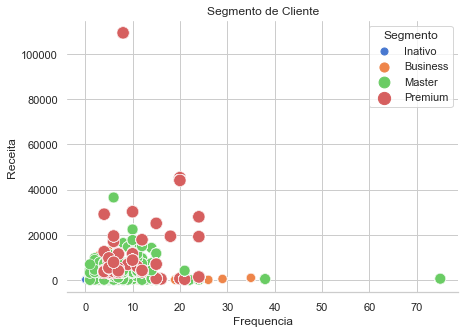

In [60]:
plot_segmento('Frequencia','Receita',df_final)

Clientes que compram com muita frequência, mas valores pequenos, estão no master. E aqueles que não compram tanto, mas gastam bastante já estão no premium.  
Aqui a gente pode ver um azulzinho saindo de trás, que é um inativo, porque ele compra pouco e gasta pouco também. A gente também tem alguns business, que são aqueles que compram não com tanta frequência assim e não gastam tanto.

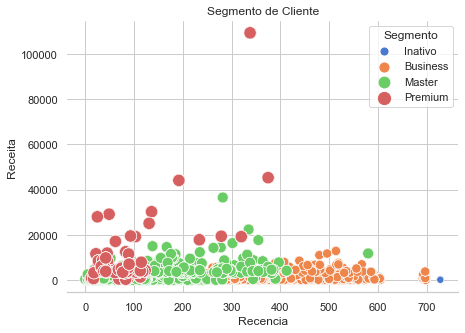

In [61]:
plot_segmento('Recencia','Receita',df_final)

O cliente que faz muito tempo que não compra e não comprou muito está no business, depois à medida que vai melhorando essa questão de recência vai virando master, e então a receita.

<AxesSubplot:xlabel='Segmento', ylabel='count'>

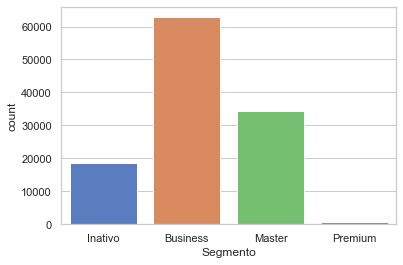

In [62]:
sns.countplot(df_final['Segmento'])

Algumas atividades que a gente pode fazer em relação a esses clientes, dependendo do segmento deles:  
- A primeira estratégia é focar na satisfação do cliente. Então, uma grande ênfase vai ter que ser dada em o quão o cliente está feliz, oferecendo uma experiência que seja positiva. Muitas vezes os clientes têm esse distanciamento em relação à empresa e acabam se sentindo mais um número, então a gente tem que focar na satisfação deles.
- Tornar as interações mais pessoais. Como as pessoas têm dificuldade em associar a empresa com a construção de conexões, podemos fazer com que eles se sintam desejados. Se for aniversário ddo cliente podemos dar um desconto especial no mês do aniversário, por exemplo. Depois que ele fizer uma compra pegar um feedback para ver se todo o processo foi bom ou não, e aí entra a parte de atendimento ao cliente.
- Construir uma comunidade. Então, se você tem um negócio tradicional, é interessante fazer eventos específicos para os clientes, que eles tenham o interesse de adquirir aquela marca, para se sentir parte de uma comunidade.
- Recompensas instantâneas sem amarras, que é dentro da ideia de fornecer descontos específicos. Mandar um email com um desconto especial para aqueles clientes que não compram a algum tempo. 
- Criar um programa de fidelidade, principalmente para os clientes que são leais, aqueles que compram sempre, ou aqueles que gastaram bastante dinheiro, mas não têm uma frequência tão alta, para aumentar a frequência desses clientes. A gente dá algo para eles trabalharem a longo prazo.
- Criar um programa vip, baseado naqueles que gastam bastante, que têm uma frequência alta e uma baixa recência, que é projetado para clientes de alto nível, então às vezes uma pessoa que gasta muito não quer um cupom de desconto. Ela quer um atendimento personalizado, ela quer que aquele item só esse tipo de cliente vai ter.
- aumentar o envolvimento das mídias sociais. Então, como ela dá acesso direto aos usuários, a gente pode utilizar qualquer ferramenta em relação a oferta, promoção. Às vezes aqueles itens de patrocínio, já que o cliente está analisando a rede social ele pode receber aquele cupom especificamente e aí aumentar a conversão.
